In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import os,sys
import helper_scripts as hs
from helper_scripts import effect_plot as EP

from helper_scripts import DimensionalReduction 

import yaml

Populating the interactive namespace from numpy and matplotlib


/Users/silas/miniconda3/lib/python3.6/site-packages/scikit_bio-0.5.5-py3.6-macosx-10.7-x86_64.egg/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
%run warm_figure_scripts.py

In [3]:


os.chdir('../data/Sequencing_C/')


config= yaml.load(open('config_analysis.yaml'))
Comparisons= list(config['Comparisons'].keys())

os.chdir('./Analysis/Analysis')




/Users/silas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


# Define Group

In [4]:
output_folder=os.path.abspath('../../../../Figures/')
SAVEPLOT=True



In [5]:
order=[ 'RT', '34°C'] 

group_colors= ['darkgrey','darkred']



Analysis_Name="TempSH"




output_folder+='/expH_'+Analysis_Name


In [6]:
hs.plotting.plotting_Setup()



os.makedirs(output_folder,exist_ok=True)




plt_params=dict(figurefolder=output_folder,
    formats=['.pdf','.svg'],
    SAVEPLOT=SAVEPLOT)               ### SAVEPLOT

# Realab

In [7]:
data=pd.read_csv('data.tsv',index_col=0,sep='\t')
data= data.apply(hs.microbiota.normalize_row,axis=1)*100
metadata= load_metadata()
rename_metadata(data,metadata)



/Users/silas/Documents/GitHub/WarmMicrobiota/Mice_microbiota/notebooks/helper_scripts/Bubbleplots.py:144: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(111)


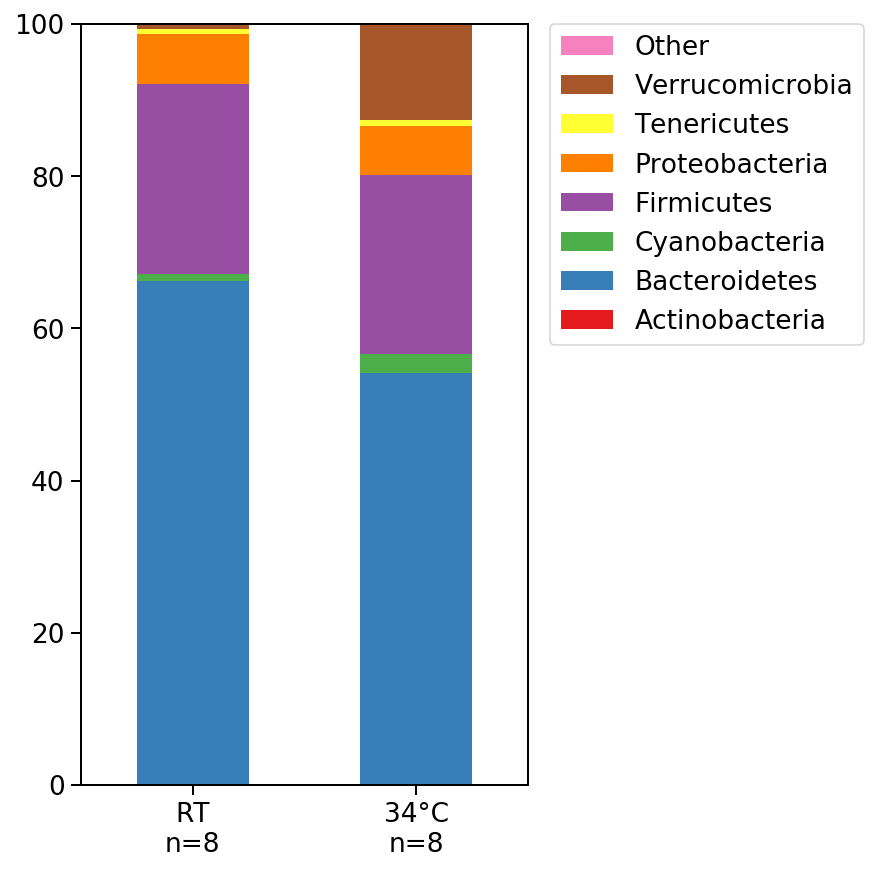

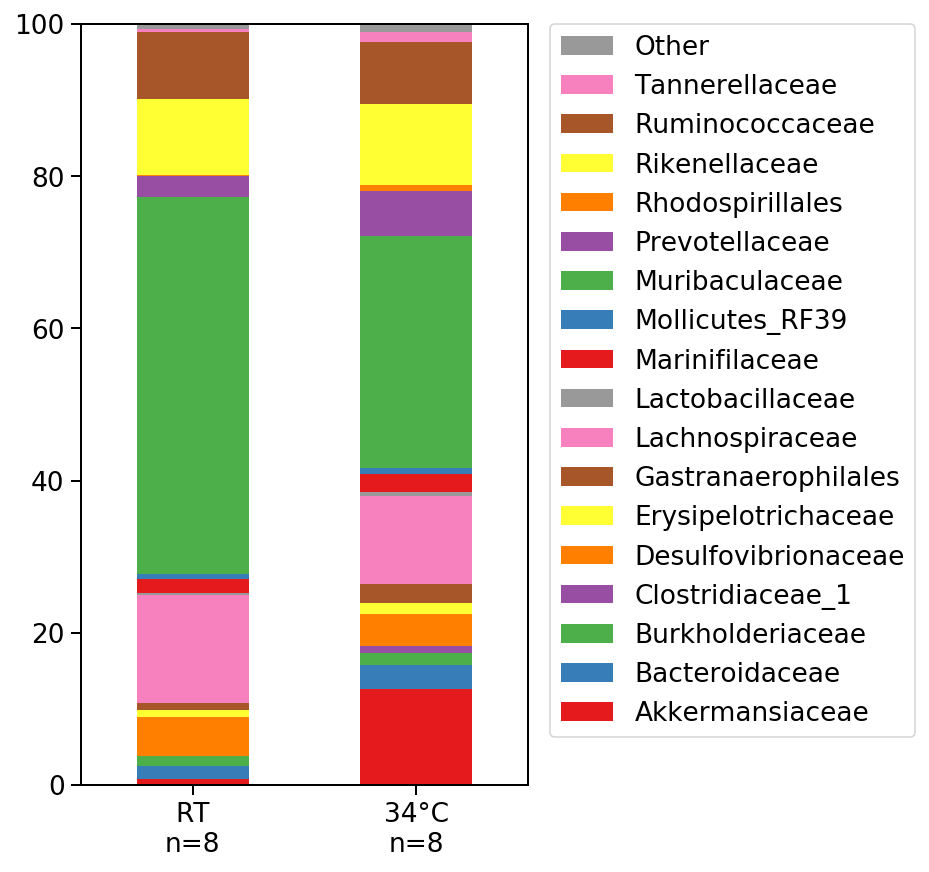

In [8]:
sns.set_palette('Set1',n_colors=18)
hs.bubble.MeanGroup_Barplot(data.groupby(Tax.ffill(axis=1).phylum,axis=1).sum(), 
                            metadata.Group,sp_keywords={'colorM':None},order=order, figsize=(4,7),
                            filtervalue=18)


hs.plotting.saveplot('Barplot_phylum',**plt_params)


sns.set_palette('Set1',n_colors=18)
hs.bubble.MeanGroup_Barplot(data.groupby(Tax.ffill(axis=1).family,axis=1).sum(), 
                            metadata.Group,sp_keywords={'colorM':None},order=order, figsize=(4,7),
                            filtervalue=18)


hs.plotting.saveplot('Barplot_family',**plt_params)

/Users/silas/Documents/GitHub/WarmMicrobiota/Mice_microbiota/notebooks/helper_scripts/microbiota.py:147: UserWarning: May be your data is not in the right orientation sample x feature
  warnings.warn("May be your data is not in the right orientation sample x feature")


<Figure size 432x288 with 0 Axes>

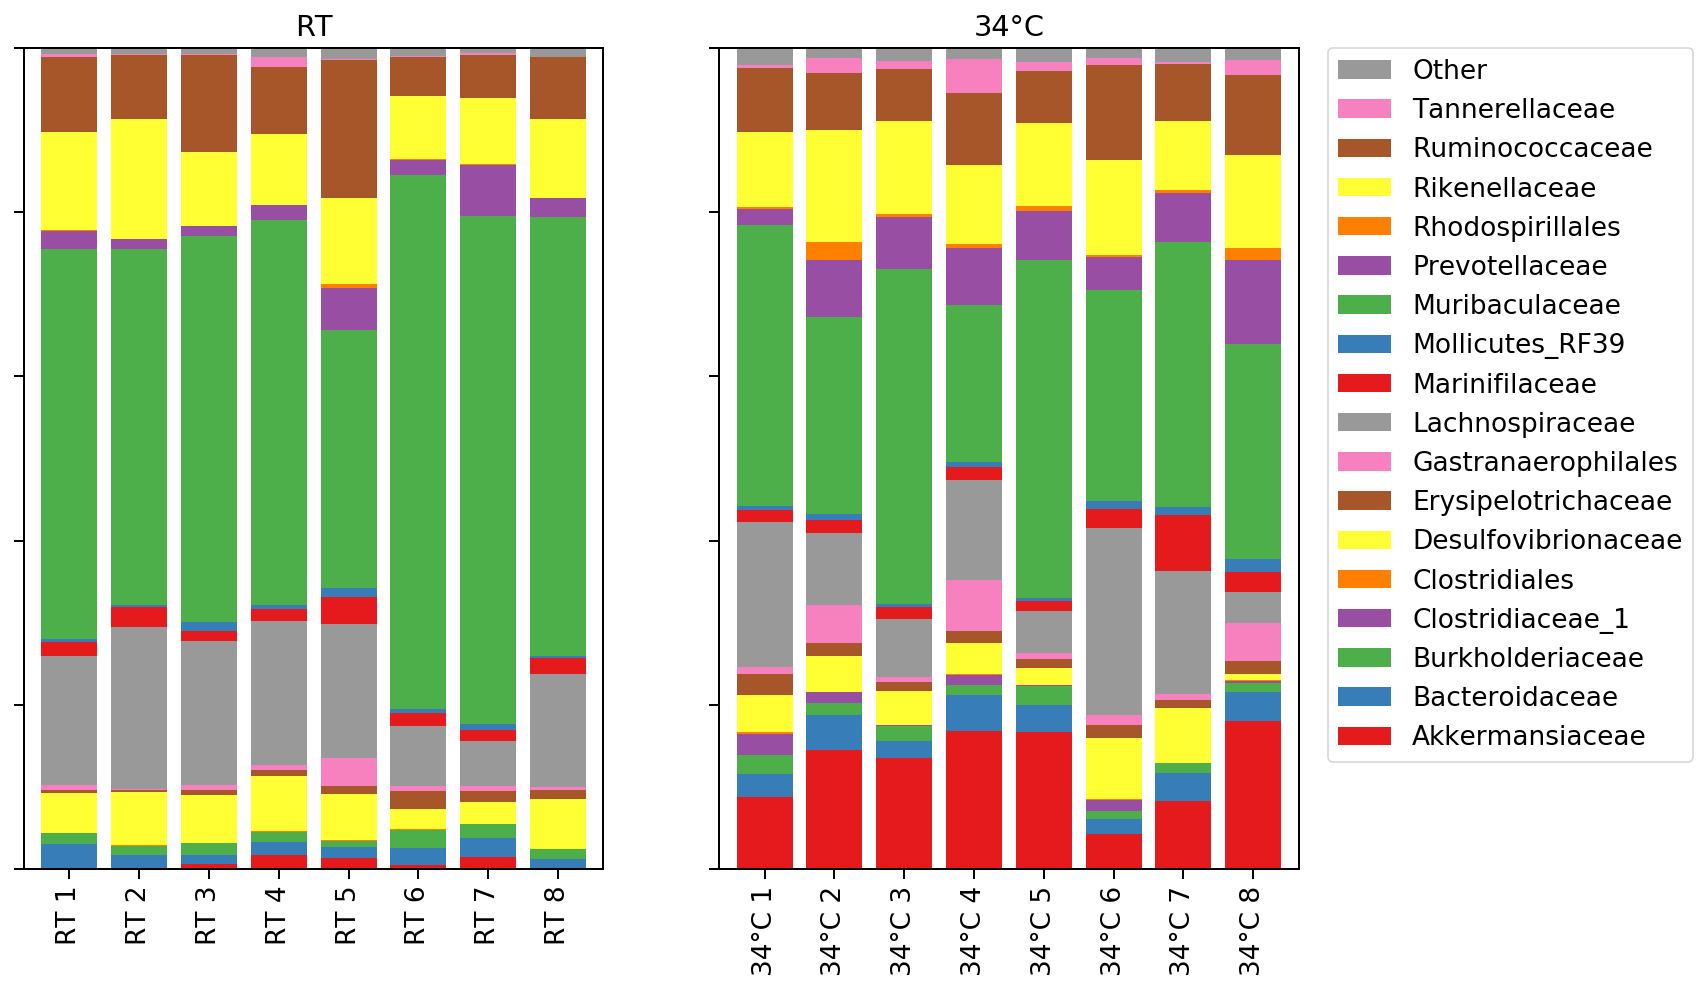

In [9]:
fig = plt.figure(constrained_layout=True)
sns.set_palette('Set1',n_colors=18)

Bar_data= data.groupby(Tax.ffill(axis=1).family,axis=1).sum()

Bar_data= hs.util.minfilter(Bar_data,18)

axe= hs.bubble.Grouped_Bar_Plot(Bar_data,metadata.Group,figsize=(12,7),
                           headers='show',order=order,
                           sp_keywords={'colorM':None,'width':0.8})

hs.plotting.saveplot('Barplot_family_individual',**plt_params)

# Richness

In [10]:
OTU= pd.read_csv('../output/seqtab.tsv',index_col=0,sep='\t')
metadata= load_metadata()
rename_metadata(OTU,metadata)
OTU,metadata= take_subset(OTU,metadata,order)


rarified= pd.DataFrame(rarefaction(OTU.values),index=OTU.index,columns=OTU.columns) 

presence_absence = (rarified>0).astype(int)
R= pd.DataFrame()
R['Richness'] = presence_absence.sum(1)
R['Shannon']= rarified.apply(hs.microbiota.shannon,axis=1)
R['Chao1']= rarified.apply(skbio.diversity.alpha.chao1,axis=1)



Tree= skbio.tree.TreeNode.read('../taxonomy/otu_tree.nwk')
Tree= Tree.root_at_midpoint()

R['Faith index']= rarified.apply(skbio.diversity.alpha.faith_pd,axis=1,args=(rarified.columns,Tree))


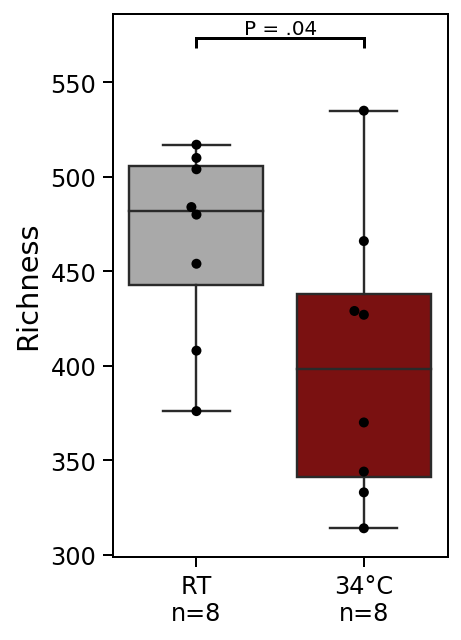

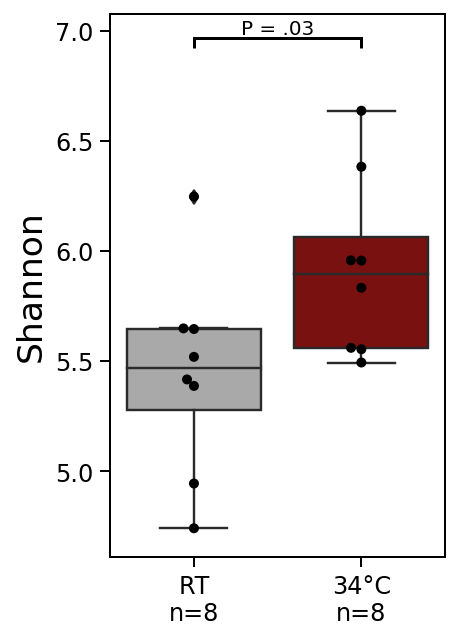

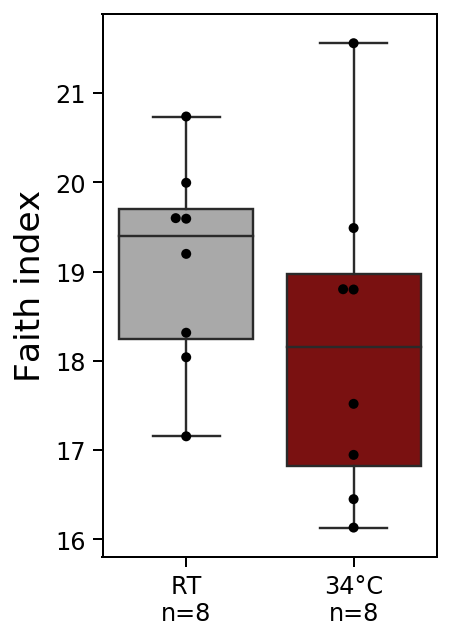

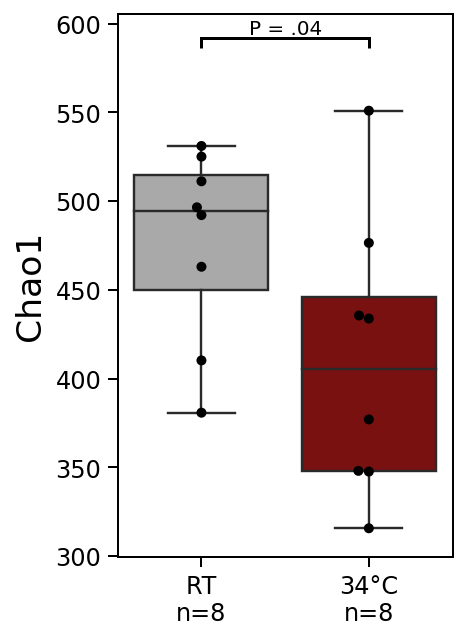

In [11]:
V=hs.Viewpoint(R,metadata.Group,order)
hs.plotting.plotting_Setup(font_scale=1.5)

sns.set_palette(group_colors)

for e in ['Richness','Shannon','Faith index','Chao1']:
    plt.figure(figsize=(3,5))
    
    ax=V.Boxplot(e)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    
    hs.plotting.saveplot(e,**plt_params)

# Aldex

In [12]:
aldex_file=f"Comparisons/{Analysis_Name}/stats_aldex.tsv"


Stats,data = load_aldex(aldex_file)
    
    
metadata= load_metadata()
data,metadata=take_subset(data,metadata)

#data= data.loc[metadata.index].copy()


rename_metadata(data,metadata)

# PCA

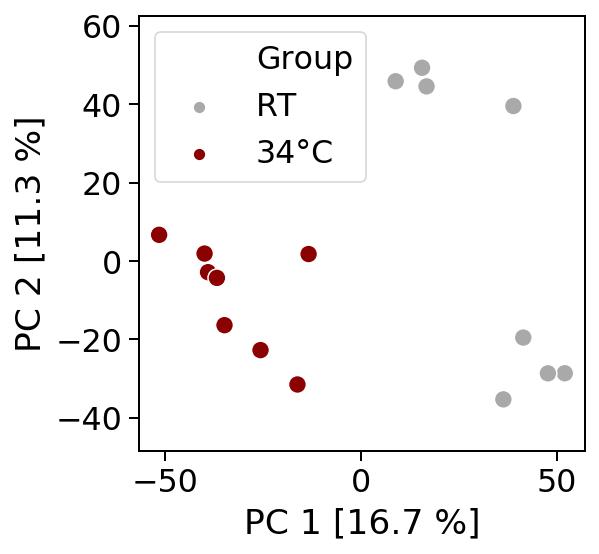

In [13]:

f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Group,palette=group_colors,s=80)

hs.plotting.saveplot('PCA',**plt_params)

In [15]:
metadata.Cage= 'Cage '+metadata.Cage.astype(str)

In [18]:
metadata.Cage.astype('category')


RT 1      Cage 1
34°C 1    Cage 3
RT 2      Cage 1
34°C 2    Cage 3
RT 8      Cage 2
RT 3      Cage 1
34°C 3    Cage 3
34°C 8    Cage 4
RT 4      Cage 1
34°C 4    Cage 3
RT 5      Cage 2
34°C 5    Cage 4
RT 6      Cage 2
34°C 6    Cage 4
RT 7      Cage 2
34°C 7    Cage 4
Name: Cage, dtype: category
Categories (4, object): [Cage 1, Cage 2, Cage 3, Cage 4]

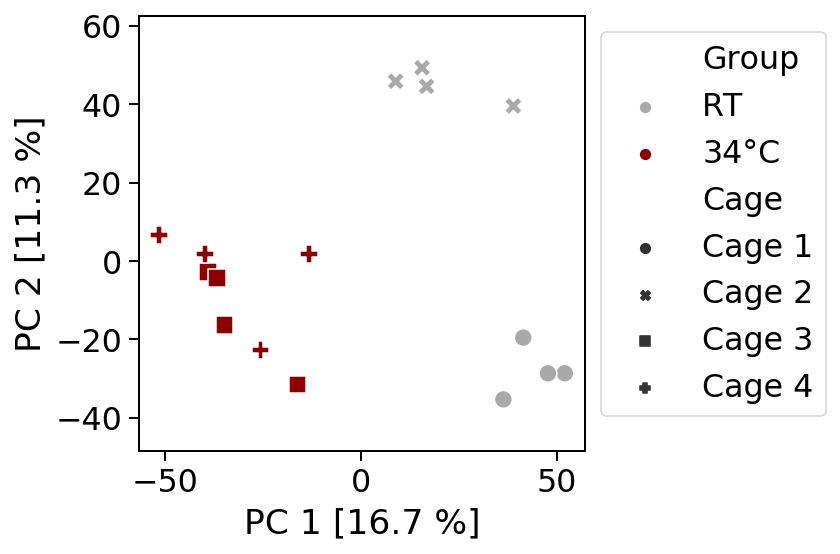

In [33]:
f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Group,
                      palette=group_colors,
                      style=metadata.Cage,
                      style_order= [f'Cage {i}'  for i in range(1,5)],
                      s=80)
plt.legend(bbox_to_anchor=(1,1))

    
hs.plotting.saveplot('PCA_with_cage_labels',**plt_params)

In [ ]:
sns.scatterplot()

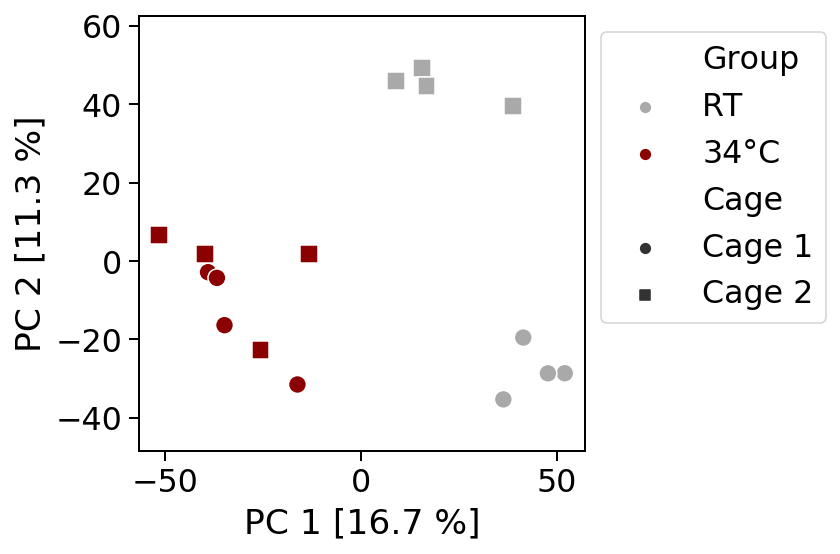

In [38]:
f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Group,
                      palette=group_colors,
                      style=metadata.Cage.replace({'Cage 3':'Cage 1','Cage 4':'Cage 2'}),
                      markers=['o','s'],
                      style_order= [f'Cage {i}'  for i in range(1,3)],
                      s=80)
plt.legend(bbox_to_anchor=(1,1))

    
hs.plotting.saveplot('PCA_with_cage_labels',**plt_params)

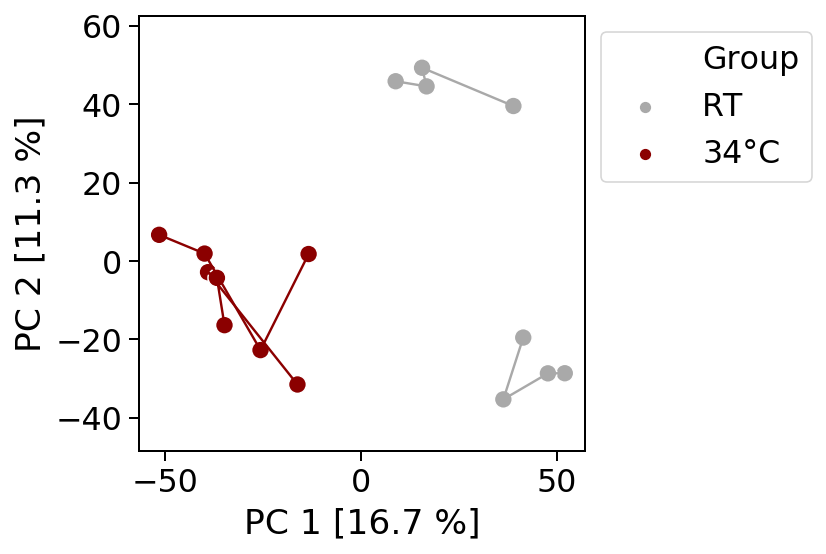

In [43]:
f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Group,palette=group_colors,s=80)
plt.legend(bbox_to_anchor=(1,1))

for cage,dc in DR.transformed_data[[1,2]].groupby(metadata.Cage):
    plt.plot(dc[1],dc[2], color=dict(zip(order,group_colors))[metadata.Group.loc[dc.index[0]]])
hs.plotting.saveplot('PCA_with_cage_labels',**plt_params)

In [ ]:
f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Cage,palette=['darkred','red','darkgray','lightgrey'],s=80)
plt.legend(bbox_to_anchor=(1,1))

#for cage,dc in DR.transformed_data[[1,2]].groupby(metadata.Cage):
#    plt.plot(dc[1],dc[2], color=dict(zip(order,group_colors))[metadata.Group.loc[dc.index[0]]])
    
    
hs.plotting.saveplot('PCA_with_cage_labels',**plt_params)

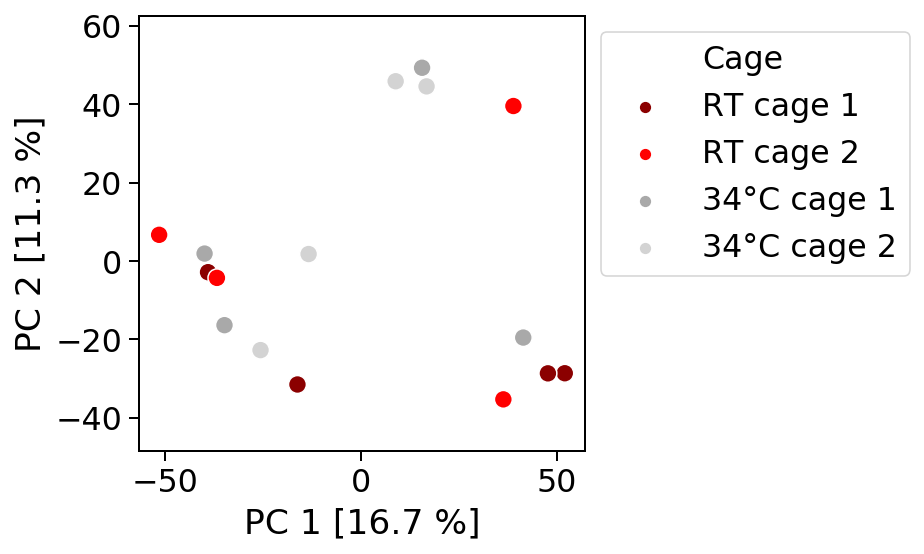

In [32]:
f= plt.figure(figsize=(4,4))

DR= DimensionalReduction.DimensionalReduction(data)
DR.plot_Components_2D(hue=metadata.Cage,palette=['darkred','red','darkgray','lightgrey'],s=80)
plt.legend(bbox_to_anchor=(1,1))

#for cage,dc in DR.transformed_data[[1,2]].groupby(metadata.Cage):
#    plt.plot(dc[1],dc[2], color=dict(zip(order,group_colors))[metadata.Group.loc[dc.index[0]]])
    
    
hs.plotting.saveplot('PCA_with_cage_labels',**plt_params)

## Heatmap

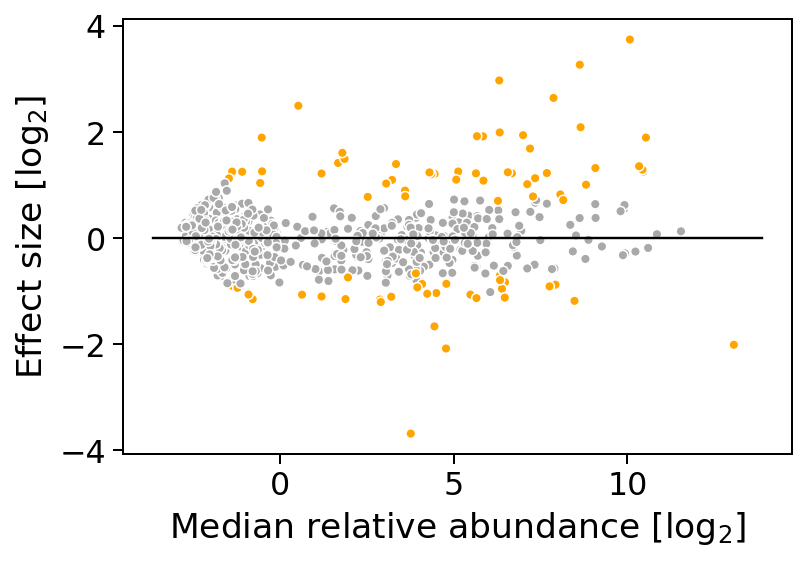

In [17]:
sig= Stats.index[(Stats['we.ep']<0.05)]


abundance_FC_plot(Stats,sig)
hs.plotting.saveplot('Effect_size_heatmap',**plt_params)

In [18]:
len(sig)

81

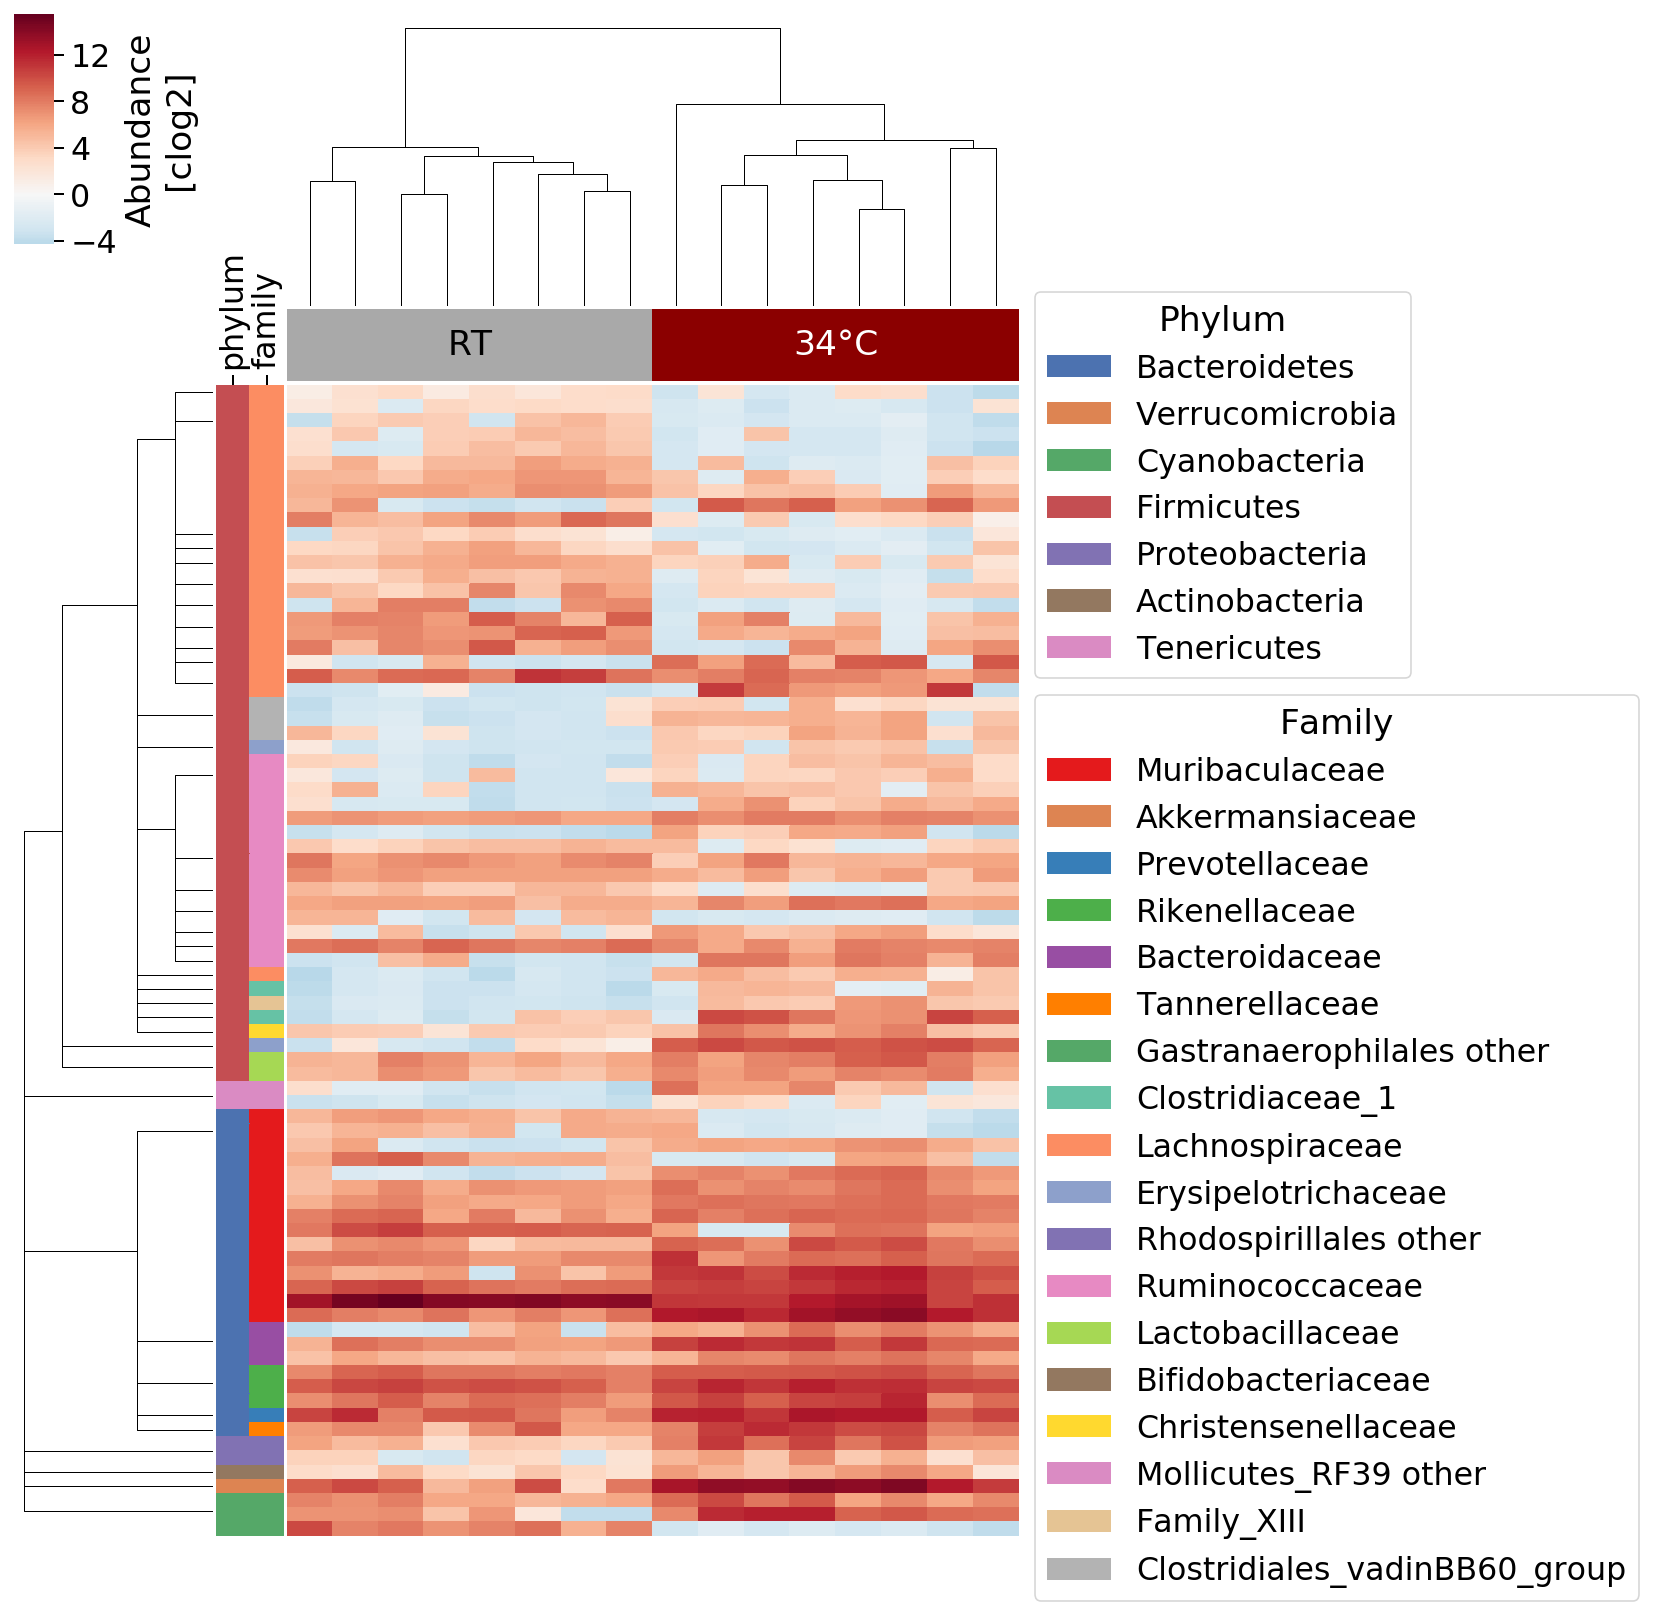

In [20]:


from helper_scripts import tree
OTU_tree = tree.load_tree('../taxonomy/otu_tree.nwk')


T= Tax.loc[sig].ffill(axis=1).copy()
T[Tax.loc[sig].isnull()]+=' other'

plt_data= data[sig].T.copy()



colors= metadata.Group.map(dict(zip(order,group_colors)))


def getcolor_map(labels,palette):
    return dict(zip(labels, sns.color_palette(palette,n_colors=len(labels))))

def map2colors(taxonomy,palette='deep'):
    return taxonomy.map(getcolor_map(taxonomy.unique(),palette))



row_colors= pd.DataFrame(index=T.index)
row_colors['phylum']= map2colors(T.phylum)
row_colors['family']= row_colors['phylum']

row_colors.loc[T.phylum=='Bacteroidetes','family']= map2colors(T.loc[T.phylum=='Bacteroidetes','family'],'Set1')
row_colors.loc[T.phylum=='Firmicutes','family']= map2colors(T.loc[T.phylum=='Firmicutes','family'],'Set2')




#linkage= tree.tree2linkage(OTU_tree,sig,'average') 
linkage= tree.taxonomy2linkage(T,species=sig)



cgi=sns.clustermap(plt_data,row_linkage=linkage,
               cmap='RdBu_r',center=0, figsize=(9,14),
               col_colors=colors,
                   row_colors= row_colors,
                   yticklabels=False,#Labels.loc[plt_data.index],
                   xticklabels=False
              )

_ =cgi.cax.set_ylabel('Abundance\n[clog2]',fontdict={'fontsize':'medium'})


# Legend


f=plt.gcf()
def generate_legend(color_labels,**legend_kws):
    f=plt.gcf()
    ax= f.add_axes((0.5,0.5+np.random.rand()/100,0,0))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    for label,color in color_labels.iteritems():
        ax.bar(0, 0, color=color, label=label, linewidth=0)
        
    ax.legend(**legend_kws)
    
    return ax

color_labels= pd.Series(index=T.phylum.values,data=row_colors.phylum.values).drop_duplicates()
l1=generate_legend(color_labels,
                title='Phylum', loc="upper left", ncol=1, bbox_to_anchor=(0.9, 0.75), bbox_transform=f.transFigure)

#l1=generate_legend(color_labels,
#                title='Phylum', loc="upper left", ncol=4, bbox_to_anchor=(0.12, 0.12), bbox_transform=f.transFigure)

color_labels= pd.Series(index=T.family.values,data=row_colors.family.values).drop_duplicates()
l2= generate_legend(color_labels,
                title='Family', loc="upper left",ncol=1, bbox_to_anchor=(0.9, 0.55), bbox_transform=f.transFigure)


cgi.ax_row_colors.xaxis.tick_top()
cgi.ax_row_colors.set_xticklabels(cgi.ax_row_colors.get_xticklabels(),rotation=90)
cgi.ax_col_colors.set_yticks([])

# Group labels in col colors
axcc= cgi.ax_col_colors
axcc.text(0.25, 0.5, 'RT', horizontalalignment='center',
          verticalalignment='center', transform=axcc.transAxes)

axcc.text(0.75, 0.5, '34°C', horizontalalignment='center',color='white',
          verticalalignment='center', transform=axcc.transAxes)

## resize 

width_ratios= cgi.gs.get_width_ratios()
width_ratios[-1]/=1.5
cgi.gs.set_width_ratios(width_ratios)
cgi.gs.update()

if plt_params['SAVEPLOT']:
    cgi.savefig(os.path.join(output_folder,'heatmap.svg'))

# Boxplots

In [21]:
effect='effect'
ab_treshold=0
p_treshold = 0.05

14

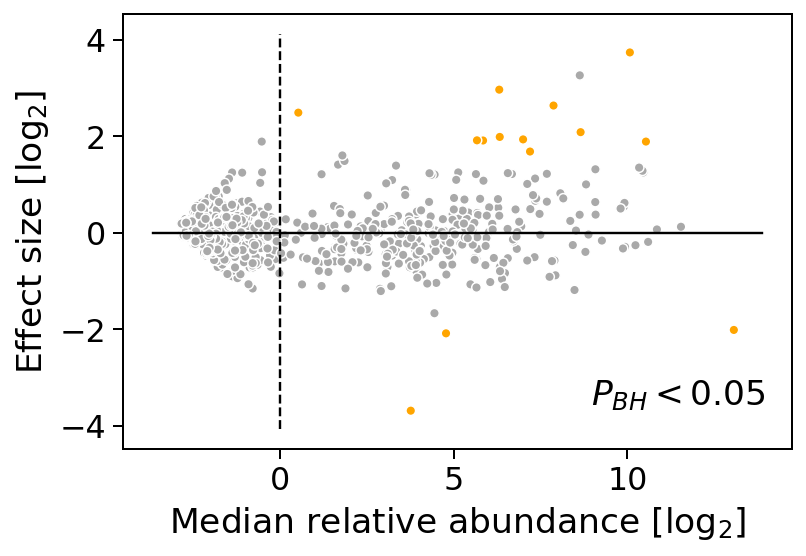

In [22]:



sig= Effect_size_plot(Stats,p_treshold=p_treshold,ab_treshold=ab_treshold)


hs.plotting.saveplot('Effect_size_boxplots_OTU',**plt_params)
len(sig)


In [23]:
Stats.drop('label',axis=1).join(Tax).to_csv(f"{output_folder}/Stats_OTU.tsv",sep='\t')

In [24]:



Pairwise_Sig= Stats[['we.ep']].T.copy()

Pairwise_Sig.index= [tuple(order)]


V=hs.Viewpoint(data,metadata.Group,order,Header_Description=Labels,
               Pairwise_Sig= Pairwise_Sig)
               

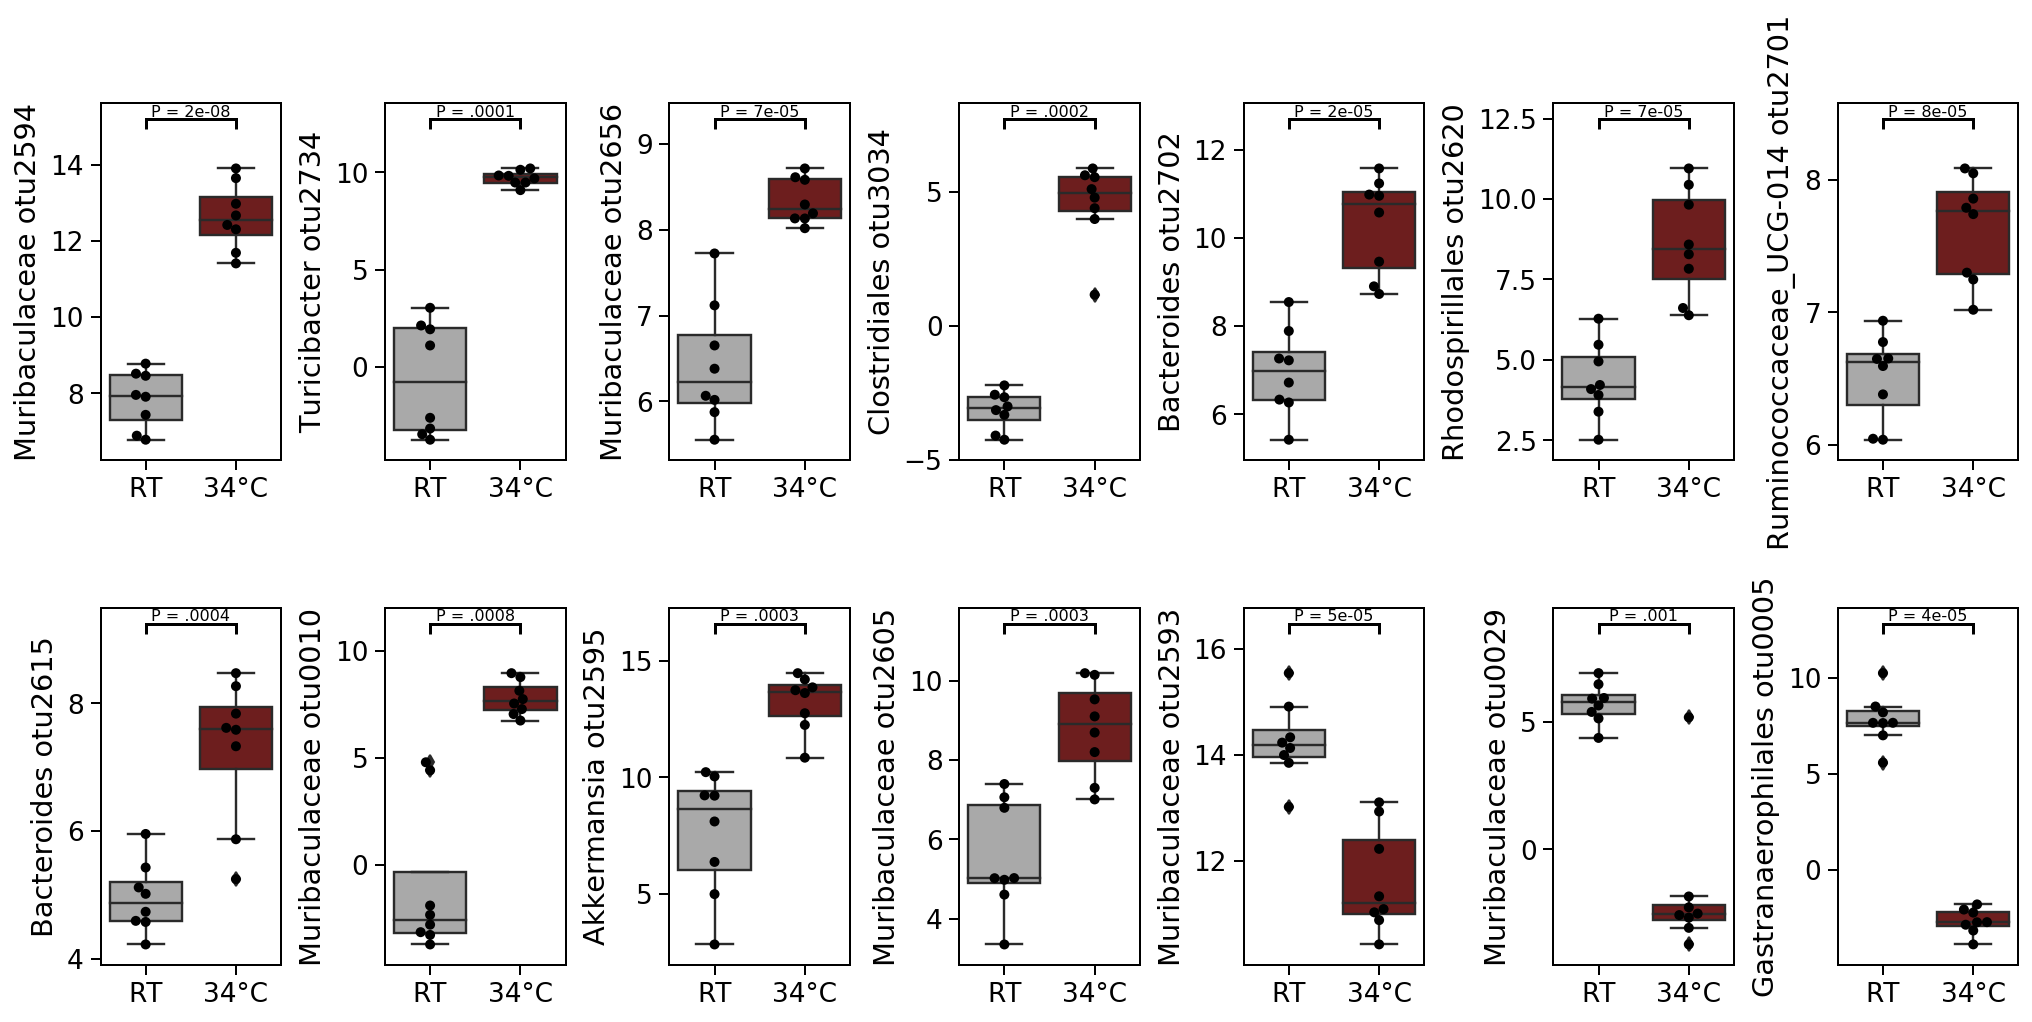

In [25]:
N= 2*7
N_rows=2


sig = Stats.loc[sig].sort_values('rab.all',ascending=False).iloc[:N].\
sort_values(effect,ascending=False).index


hs.plotting.plotting_Setup(font_scale=1.5)
sns.set_palette(group_colors,desat=0.75)


axe= multiplot(V,N_rows,N//N_rows,sig,figsize=(14,7),sharey=False,pannel_letters=False,sig_labels_params={'font_size':8})
#plt.tight_layout(w_pad=0.1,h_pad=0.1)

for ax in axe:
    ax.set_xticklabels(order)

    
hs.plotting.saveplot('Boxplot_OTU',**plt_params)

## Genus

In [26]:

StatsG,G = load_aldex(f"../Analysis_genus/Comparisons/{Analysis_Name}/stats_aldex.tsv")
metadata= load_metadata()


rename_metadata(G,metadata)


StatsG.drop('label',axis=1).to_csv(f"{output_folder}/Stats_genus.tsv",sep='\t')



15

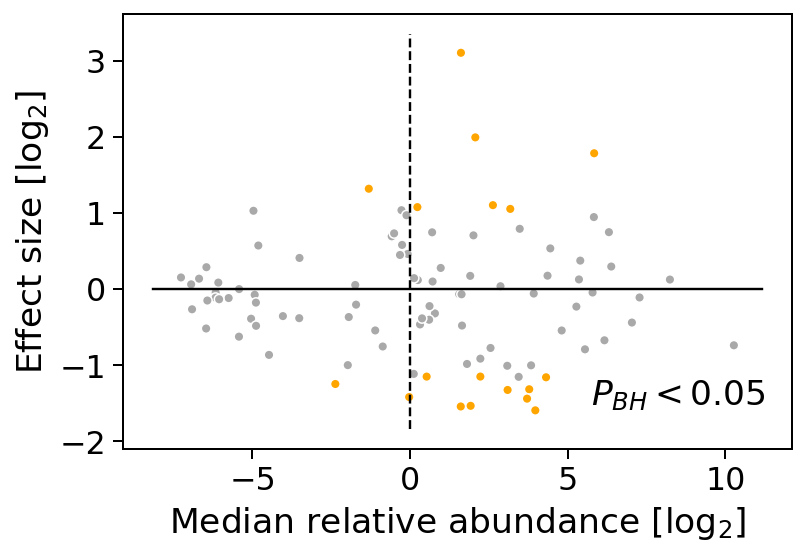

In [27]:
sigG=  Effect_size_plot(StatsG,p_treshold=p_treshold,ab_treshold=ab_treshold)

hs.plotting.saveplot('Effect_size_boxplots_Genus',**plt_params)
len(sigG)

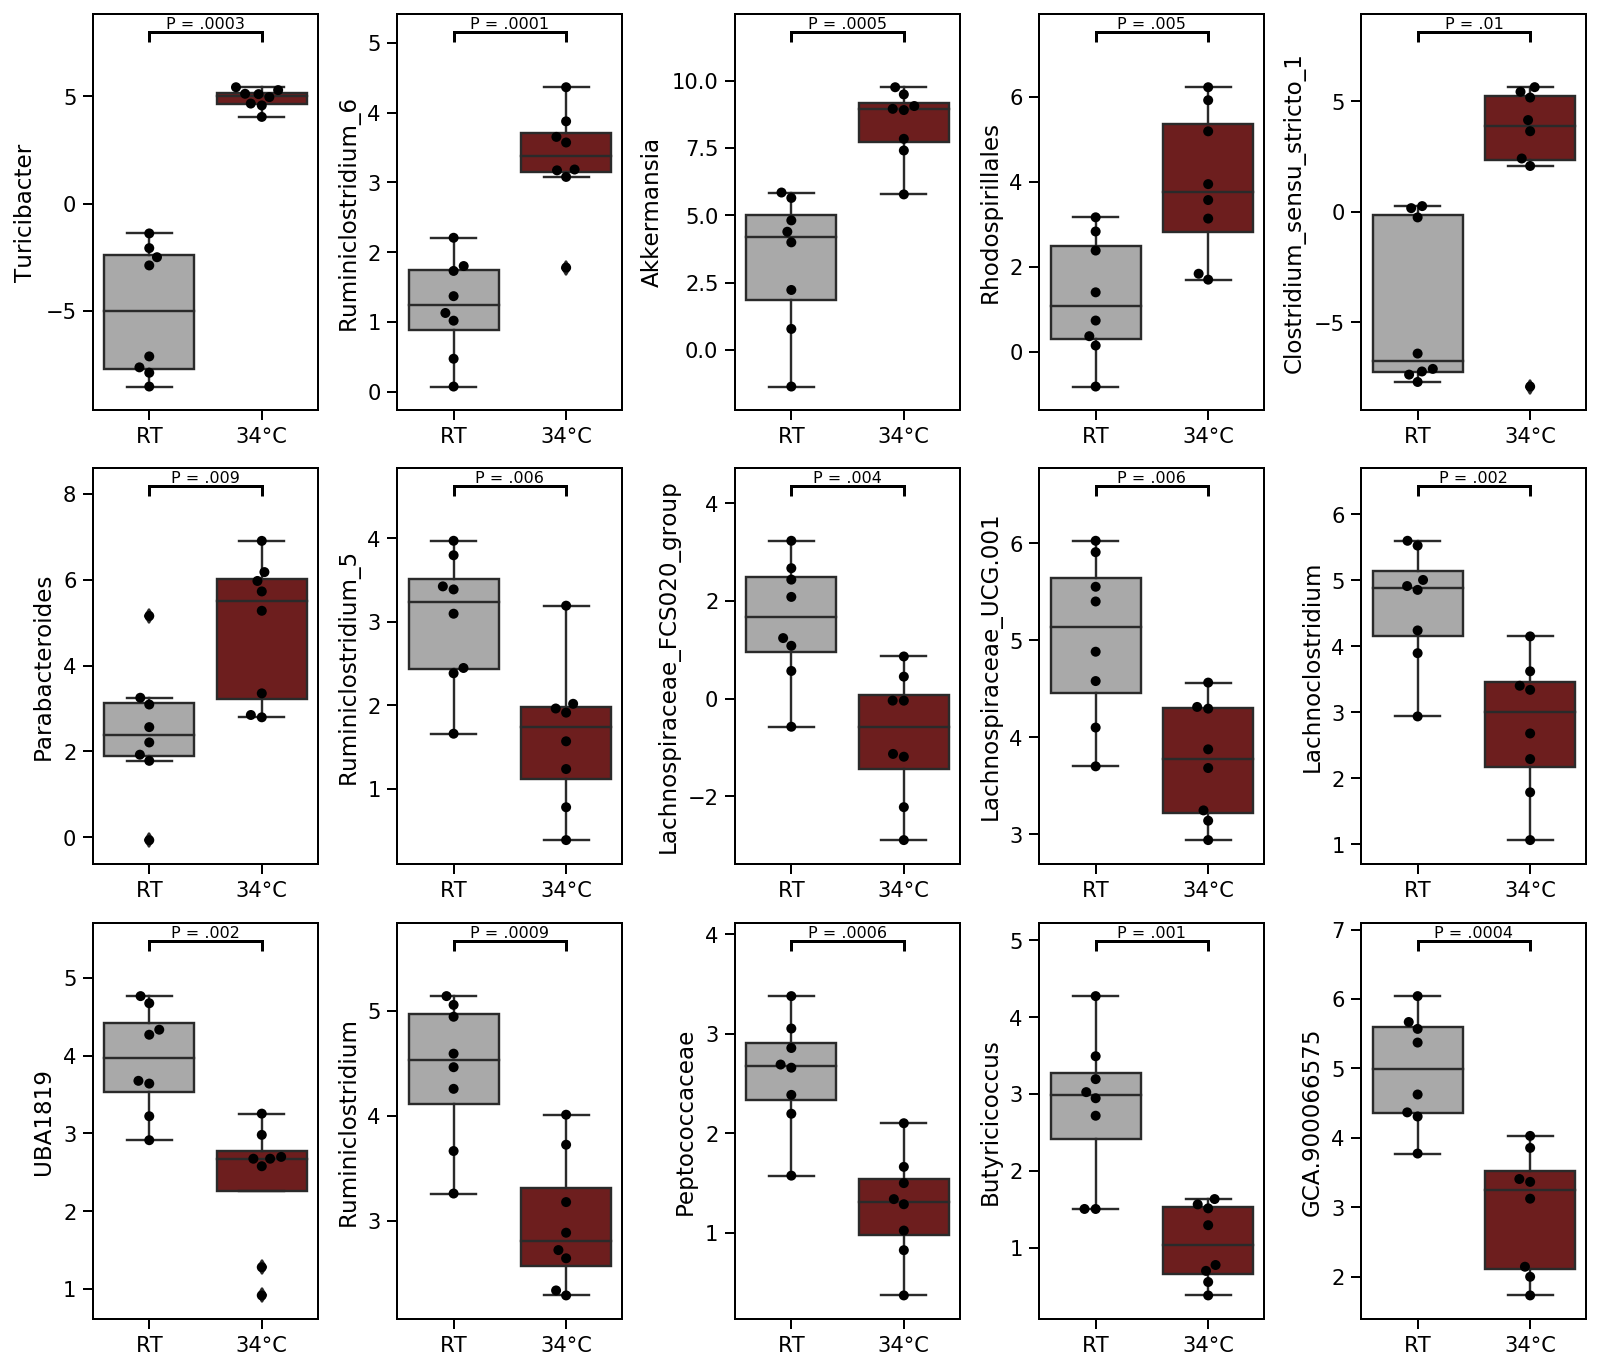

In [28]:
hs.plotting.plotting_Setup(font_scale=1.2)
sns.set_palette(group_colors,desat=0.75)

Pairwise_Sig= StatsG[['we.ep']].T.copy()
Pairwise_Sig.index= [tuple(order)]

VG=hs.Viewpoint(G,metadata.Group,order,
               Pairwise_Sig= Pairwise_Sig)


N= 3*5
N_rows=3


sigG = StatsG.loc[sigG].sort_values('rab.all',ascending=False).iloc[:N].\
sort_values(effect,ascending=False).index


hs.plotting.plotting_Setup(font_scale=1.2)
sns.set_palette(group_colors,desat=0.75)


axe= multiplot(VG,N_rows,N//N_rows,sigG,figsize=(1+N//N_rows*2,2.8*N_rows+1),
               sharey=False,pannel_letters=False,sig_labels_params={'font_size':8})


for ax in axe:
    ax.set_xticklabels(order)


    
hs.plotting.saveplot('Boxplot_Genus',**plt_params)

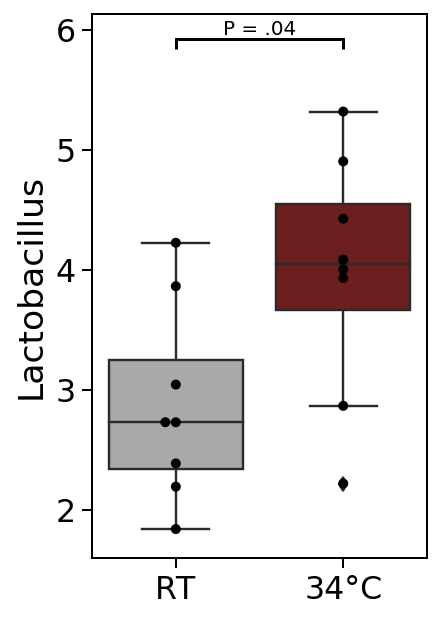

In [29]:
f= plt.figure(figsize=(3,5))
ax=VG.Boxplot('Lactobacillus')
ax.set_xticklabels(order)
hs.plotting.saveplot('Boxplot_sham_Lactobacillus_genus',**plt_params)


30


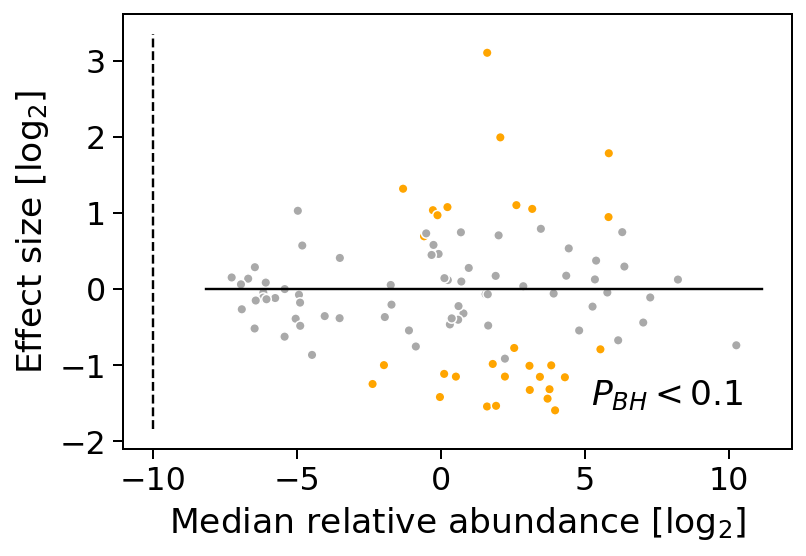

In [30]:
sig=  Effect_size_plot(StatsG,p_treshold=0.1,ab_treshold=-10)
print(len(sig))

#sig=  Effect_size_plot(StatsG,p_treshold=0.05,ab_treshold=-1,p_value_method='wi.ep')
#len(sig)

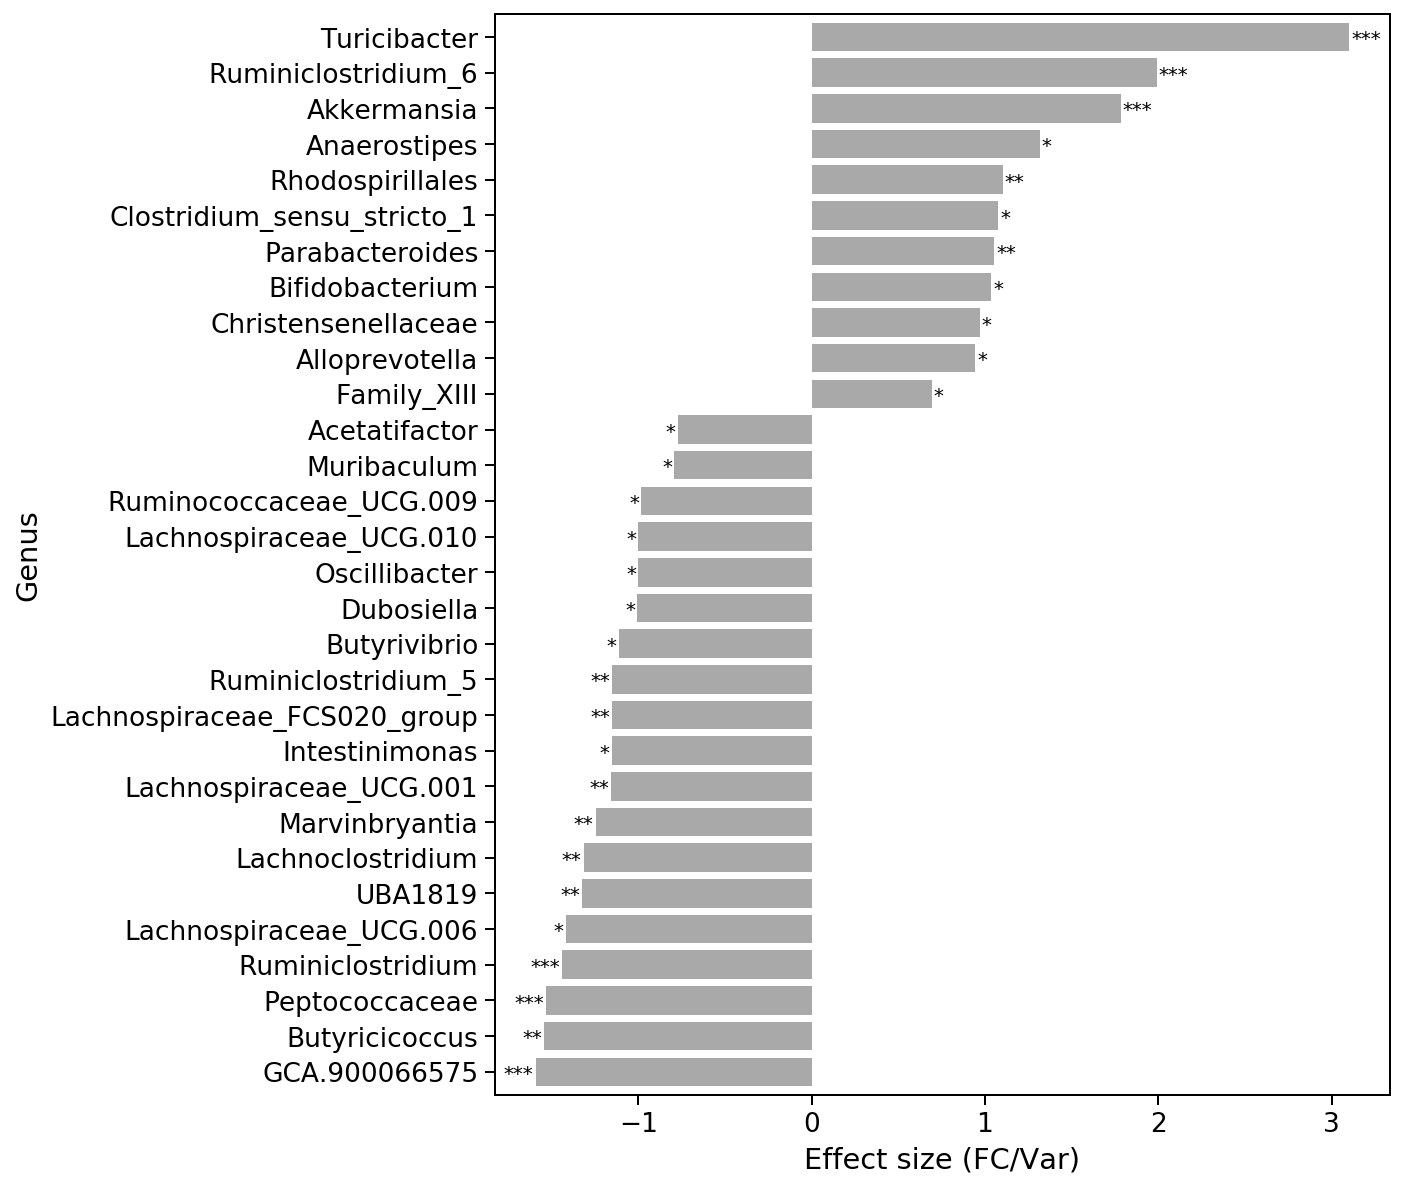

In [31]:



hs.plotting.plotting_Setup()
ax= EP.effect_plot(StatsG.loc[sig,[effect]], 
               StatsG[['we.ep']],width=0.8,colors=['darkgrey'])
if effect=='effect':
    ax.set_xlabel("Effect size (FC/Var)")
    
ax.set_ylabel('Genus')
ax.legend().set_visible(False)
plt.tight_layout()

hs.plotting.saveplot('Barplot_Genus',**plt_params)

## Family

6

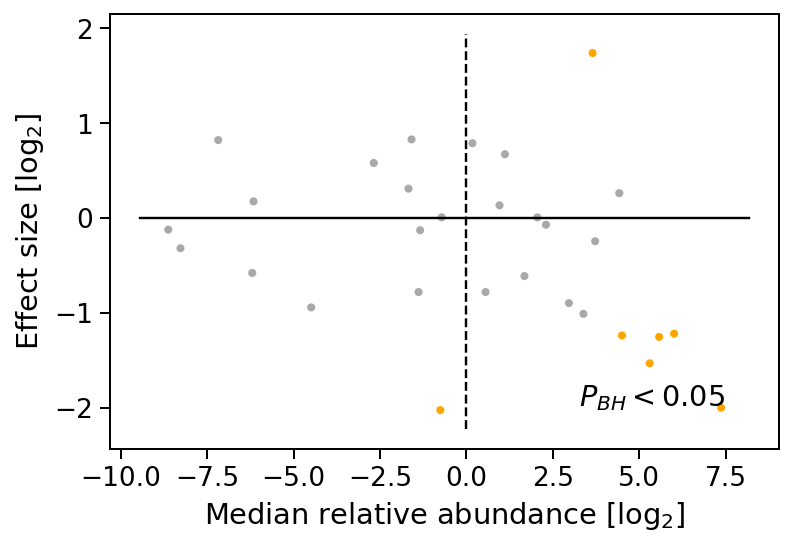

In [32]:

StatsF,F = load_aldex(f"../Analysis_family/Comparisons/{Analysis_Name}/stats_aldex.tsv")
metadata= load_metadata()


rename_metadata(F,metadata)


sigF= Effect_size_plot(StatsF,p_treshold=p_treshold,ab_treshold=ab_treshold)

StatsF.drop('label',axis=1).to_csv(f"{output_folder}/Stats_Family.tsv",sep='\t')

hs.plotting.saveplot('Effect_size_boxplots_Family',*plt_params)
len(sigF)

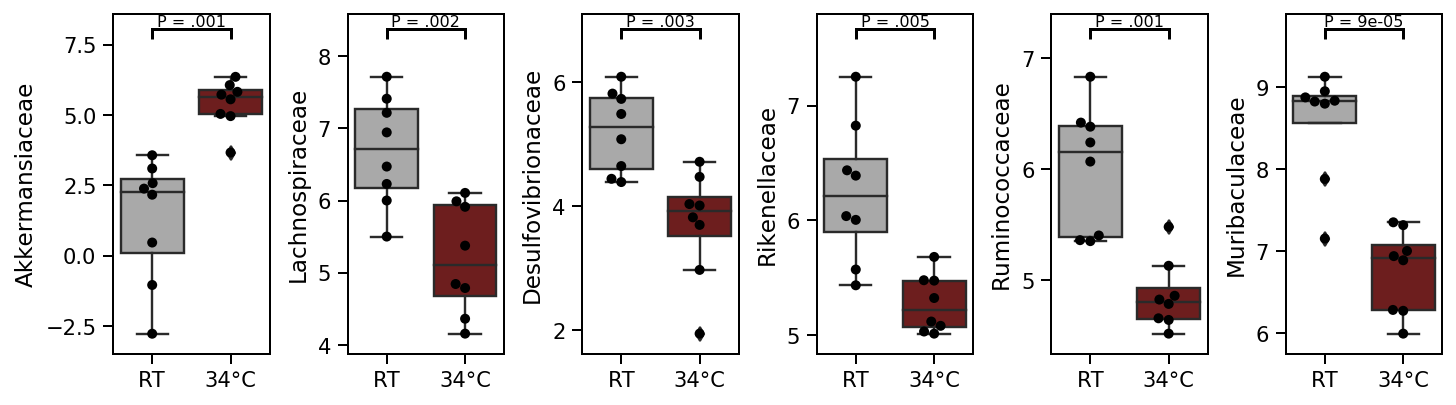

In [33]:


Pairwise_Sig= StatsF[['we.ep']].T.copy()
Pairwise_Sig.index= [tuple(order)]

VF=hs.Viewpoint(F[sigF],metadata.Group,order,
               Pairwise_Sig= Pairwise_Sig)


N= len(sigF)
N_rows=1


sigF = StatsF.loc[sigF].sort_values('rab.all',ascending=False).iloc[:N].\
sort_values(effect,ascending=False).index


hs.plotting.plotting_Setup(font_scale=1.2)
sns.set_palette(group_colors,desat=0.75)


axe= multiplot(VF,N_rows,N//N_rows,sigF,figsize=(10,2.7),
               sharey=False,pannel_letters=False,sig_labels_params={'font_size':8})




for ax in axe:
    ax.set_xticklabels(order)

    
hs.plotting.saveplot('Boxplot_Family',**plt_params)